In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/gastos_2003_2022.csv", dtype=str, encoding='cp850', delimiter=';')
df.head()

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC
0,02/01/2003,***.010.008-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
1,02/01/2003,***.010.008-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N
2,02/01/2003,***.868.251-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N
3,03/01/2003,***.004.131-**,00592717000170,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVI´┐¢OS DE TERCEIROS-PESSOA JUR´┐¢DICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N
4,03/01/2003,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COM´┐¢RCIO DE MATERIAIS PARA...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZA´┐¢´┐¢O,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N


In [3]:
#Verificar o total de linhas e colunas
df.shape

(113340, 8)

In [4]:
#Veriricar informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113340 entries, 0 to 113339
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATA PGTO               113340 non-null  object
 1   CPF SERVIDOR            113340 non-null  object
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object
 3   NOME FORNECEDOR         113340 non-null  object
 4   VALOR                   113339 non-null  object
 5   TIPO                    113340 non-null  object
 6   SUBELEMENTO DE DESPESA  113340 non-null  object
 7   CDIC                    113340 non-null  object
dtypes: object(8)
memory usage: 6.9+ MB


In [5]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                0
CPF/CNPJ FORNECEDOR       434
NOME FORNECEDOR             0
VALOR                       1
TIPO                        0
SUBELEMENTO DE DESPESA      0
CDIC                        0
dtype: int64

In [6]:
#Verificar o percentual dos dados nulos
(df.isnull().sum() / len(df)) * 100

DATA PGTO                 0.000000
CPF SERVIDOR              0.000000
CPF/CNPJ FORNECEDOR       0.382919
NOME FORNECEDOR           0.000000
VALOR                     0.000882
TIPO                      0.000000
SUBELEMENTO DE DESPESA    0.000000
CDIC                      0.000000
dtype: float64

In [7]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                0
CPF/CNPJ FORNECEDOR       434
NOME FORNECEDOR             0
VALOR                       1
TIPO                        0
SUBELEMENTO DE DESPESA      0
CDIC                        0
dtype: int64

In [8]:
# Convertendo a coluna 'DATA PGTO' para datetime
df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Criar colunas separadas para o dia, mês e ano
df['DIA PGTO'] = df['DATA PGTO'].dt.day
df['MES PGTO'] = df['DATA PGTO'].dt.month
df['ANO PGTO'] = df['DATA PGTO'].dt.year

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113339 non-null  object        
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 8.2+ MB
None


,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
0,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.696,90",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
1,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.336,60",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
2,2003-01-02,***.868.251-**,31349202000177,JW TRANSPORTADORA TUR´┐¢STICA,"R$ 1.396,43",D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,2,1,2003
3,2003-01-03,***.004.131-**,00592717000170,FLORES ALVORADA,"R$ 8.585,00",C,OUTROS SERVI´┐¢OS DE TERCEIROS-PESSOA JUR´┐¢DICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
4,2003-01-03,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COM´┐¢RCIO DE MATERIAIS PARA...,"R$ 251,50",C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZA´┐¢´┐¢O,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,3,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
113335,2022-12-03,***.136.591-**,17261661005728,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,"179,5",C,FORNECIMENTO DE ALIMENTA´┐¢´┐¢O,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113336,2022-12-03,***.136.591-**,39879944000116,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,"54,95",C,GENEROS DE ALIMENTA´┐¢´┐¢O,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,3,12,2022
113337,2022-12-04,***.136.591-**,47508411094975,COMPANHIA BRASILEIRA DE DISTRIBUI´┐¢´┐¢O,"518,07",C,GENEROS DE ALIMENTA´┐¢´┐¢O,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022
113338,2022-12-04,***.136.591-**,12550441000146,RESTAURANTE SOHO,"330,52",C,FORNECIMENTO DE ALIMENTA´┐¢´┐¢O,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,4,12,2022


In [9]:
#Converter os valores para posterior realização de cálculos

# Remover 'R$', substituir ponto (milhar) por vazio e a vírgula por ponto (decimal)
df['VALOR'] = df['VALOR'].str.replace('R$', '')   # Remove 'R$'
df['VALOR'] = df['VALOR'].str.replace('-', '')   # Remove 'R$'
df['VALOR'] = df['VALOR'].str.replace('.', '')    # Remove o separador de milhar
df['VALOR'] = df['VALOR'].str.replace(',', '.')   # Substitui a vírgula decimal por ponto
df['VALOR'] = df['VALOR'].str.strip()

In [10]:
#Remoção de dados com valores negativos
df = df.dropna(subset=["VALOR"])

# Converter para tipo numérico (float)
df['VALOR'] = pd.to_numeric(df['VALOR'])



In [11]:
# Verificar resultado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113339 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113339 non-null  datetime64[ns]
 1   CPF SERVIDOR            113339 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112905 non-null  object        
 3   NOME FORNECEDOR         113339 non-null  object        
 4   VALOR                   113339 non-null  float64       
 5   TIPO                    113339 non-null  object        
 6   SUBELEMENTO DE DESPESA  113339 non-null  object        
 7   CDIC                    113339 non-null  object        
 8   DIA PGTO                113339 non-null  int32         
 9   MES PGTO                113339 non-null  int32         
 10  ANO PGTO                113339 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB
None


In [12]:
df.sample(5)

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
30378,2007-02-28,***.582.401-**,04990249000142,HOTEL EXCLUSIVO LTDA,98.00,C,HOSPEDAGENS,00200.000823/2007-63.R.08.27/02/2007.31/12/2014.N,28,2,2007
98194,2018-06-08,***.002.851-**,00442798000121,COPALIMPA PRODUTOS DE LIMPEZA E UTILIDADES LTDA,278.00,C,MATERIAL DE COPA E COZINHA,00140.000393/2018-94.R.08.29/05/2018.31/12/2018.N,8,6,2018
106887,2021-03-09,***.135.521-**,47508411103559,COMPANHIA BRASILEIRA DE DISTRIBUI´┐¢´┐¢O P´┐¢O...,16.62,C,GENEROS DE ALIMENTA´┐¢´┐¢O,00140.000161/2021-31.R.08.02/03/2021.31/12/2022,9,3,2021
60114,2010-07-11,***.455.101-**,08998246000106,BOURBON IBIRAPUERA HOTEL & CONVENTION,189.00,C,HOSPEDAGENS,00150.001036/2010-77.R.08.26/06/2010.31/12/2014.N,11,7,2010
48497,2009-03-19,***.787.941-**,07091343000158,RESTPAM COM´┐¢RCIO VAREJISTA DE ALIMENTOS LTDA.,501.60,C,FORNECIMENTO DE ALIMENTA´┐¢´┐¢O,00150.000685/2009-17.R.08.25/02/2009.31/12/2014.N,19,3,2009


In [13]:
#Qual período (menor e maior ano) temos ?

print(df["ANO PGTO"].min())
print(df["ANO PGTO"].max())

2003
2022


In [14]:
#Dados estatísticos sobre o valor
df["VALOR"].describe()

count    113339.000000
mean       1013.756050
std        3970.058534
min           0.000000
25%         111.000000
50%         288.120000
75%         691.455000
max      312903.360000
Name: VALOR, dtype: float64

In [15]:
df.VALOR.sort_values(ascending=False)

106518    312903.36
46373     290176.00
110853    217711.45
110287    202936.70
106253    180154.20
            ...    
63212          0.27
6406           0.20
58897          0.20
30442          0.12
103394         0.00
Name: VALOR, Length: 113339, dtype: float64

In [16]:
#Despesa com valor igual a 0 ?
df[df["VALOR"] == 0]

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
103394,2020-02-07,***.357.911-**,34121249000258,S. MARIA DE FREITAS EIRELI,0.0,D,"SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL",00150.000043/2020-23.R.08.27/01/2020.31/12/2022.N,7,2,2020


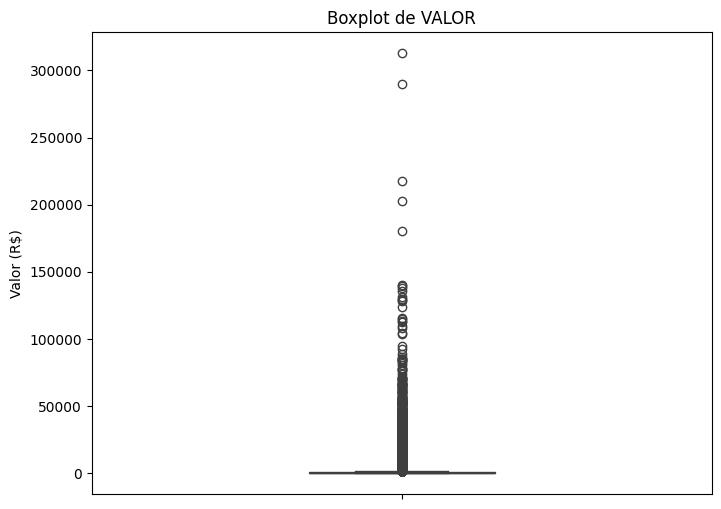

In [17]:
#Visualização gráfica


# Criar a figura para o gráfico de boxplot
plt.figure(figsize=(8, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y=df['VALOR'], width=0.3)

# Adicionar título e rótulos
plt.title('Boxplot de VALOR')
plt.ylabel('Valor (R$)')

# Mostrar o gráfico
plt.show()


In [18]:
#Despesas com valores muito altos ?
df[df["VALOR"] > 150000].sort_values(by="VALOR", ascending=False)

,DATA PGTO,CPF SERVIDOR,CPF/CNPJ FORNECEDOR,NOME FORNECEDOR,VALOR,TIPO,SUBELEMENTO DE DESPESA,CDIC,DIA PGTO,MES PGTO,ANO PGTO
106518,2021-01-03,***.784.930-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,312903.36,C,HOSPEDAGENS,00150.000815/2020-27.R.08.30/01/2021.31/12/2022.N,3,1,2021
46373,2008-12-17,***.868.251-**,00866577000857,SAUIPE S.A - SAUIPE PARK,290176.00,C,HOSPEDAGENS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,17,12,2008
110853,2022-03-02,***.955.038-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,217711.45,C,HOSPEDAGENS,00150.000109/2022-47.R.08.18/02/2022.31/12/2022.N,2,3,2022
110287,2021-12-23,***.455.101-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,202936.70,C,HOSPEDAGENS,00150.000759/2021-10.R.08.24/11/2021.31/12/2022.N,23,12,2021
106253,2020-12-28,***.357.911-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,180154.20,C,HOSPEDAGENS,00150.000812/2020-93.R.08.27/12/2020.31/12/2022.N,28,12,2020


In [19]:
#1 - Total de Despesas
#1.1 - Despesas por ano

# Agrupar por 'ANO PGTO' e somar os valores
despesas_por_ano = df.groupby('ANO PGTO')['VALOR'].sum().reset_index()

# Exibir o resultado
print(despesas_por_ano)

    ANO PGTO       VALOR
0       2003  5327599.63
1       2004  6541238.37
2       2005  5204035.80
3       2006  4977941.73
4       2007  3857905.40
5       2008  6084616.50
6       2009  5438947.19
7       2010  6558479.17
8       2011  4591108.86
9       2012  4598570.59
10      2013  6022013.05
11      2014  9305096.62
12      2015  5706943.28
13      2016  4192262.08
14      2017  4003637.84
15      2018  4866043.60
16      2019  5382478.10
17      2020  7314318.09
18      2021  9927562.29
19      2022  4997298.75


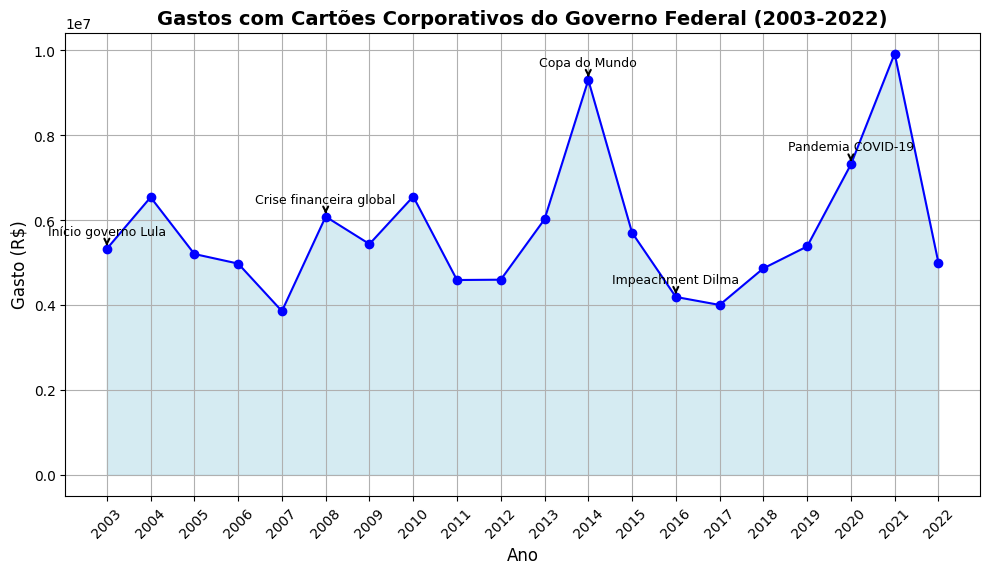

In [20]:
#1 - Total de Despesas
#1.1 - Despesas por ano

# Dados dos gastos por ano
anos = despesas_por_ano['ANO PGTO'].tolist()

gastos = despesas_por_ano['VALOR'].tolist()

# Criação do gráfico
plt.figure(figsize=(10, 6))

plt.plot(anos, gastos, marker='o', color='b', label="Gastos com Cartões Corporativos")
plt.fill_between(anos, gastos, color='lightblue', alpha=0.5)

# Adicionando títulos e rótulos
plt.title('Gastos com Cartões Corporativos do Governo Federal (2003-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Gasto (R$)', fontsize=12)

# Destacar eventos históricos
eventos = {
    2003: "Início governo Lula",
    2008: "Crise financeira global",
    2014: "Copa do Mundo",
    2016: "Impeachment Dilma",
    2020: "Pandemia COVID-19"
}

for ano, evento in eventos.items():
    plt.annotate(evento, (ano, gastos[anos.index(ano)]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9,
                 arrowprops=dict(arrowstyle="->", lw=1.5))

# Ajustes finais no gráfico
plt.grid(True)
plt.xticks(anos, rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


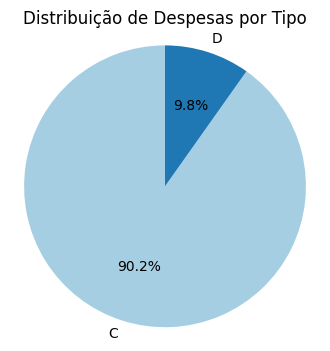

In [21]:
#1 - Total de Despesas
#1.2 - Despesas por tipo

# Agrupar por 'TIPO' e somar os valores
despesas_por_tipo = df.groupby('TIPO')['VALOR'].sum().reset_index()

# Exibir o resultado
#print(despesas_por_tipo)

# Criar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(despesas_por_tipo["VALOR"], labels=despesas_por_tipo["TIPO"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Despesas por Tipo')

# Garantir que o gráfico de pizza seja desenhado como um círculo
plt.axis('equal')

# Mostrar o gráfico
plt.show()

In [22]:
#1 - Total de Despesas
#1.3 - Despesas por subelemento

# Agrupar por 'SUBELEMENTO DE DESPESA' e somar os valores
despesas_por_subelemento = df.groupby('SUBELEMENTO DE DESPESA')['VALOR'].sum().reset_index()

# Ordenar os resultados do maior para o menor (opcional)
despesas_por_subelemento = despesas_por_subelemento.sort_values(by='VALOR', ascending=False)

# Exibir o resultado
print(despesas_por_subelemento)

                         SUBELEMENTO DE DESPESA        VALOR
32                                  HOSPEDAGENS  55397375.34
31                   GENEROS DE ALIMENTA´┐¢´┐¢O  17150021.48
28              FORNECIMENTO DE ALIMENTA´┐¢´┐¢O  14753514.55
35               LOCACAO DE MEIOS DE TRANSPORTE  11257546.49
87   SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL   8194045.44
..                                          ...          ...
5            AQUISI´┐¢´┐¢O DE SOFTWARES DE BASE        35.60
99                SERVI´┐¢OS DE ´┐¢GUA E ESGOTO        27.25
52                         MATERIAL BIOL´┐¢GICO        12.70
80            OUTRAS DESPESAS COM LOCOMO´┐¢´┐¢O        10.80
102                    SERVI´┐¢OS JUDICI´┐¢RIOS         2.65

[112 rows x 2 columns]


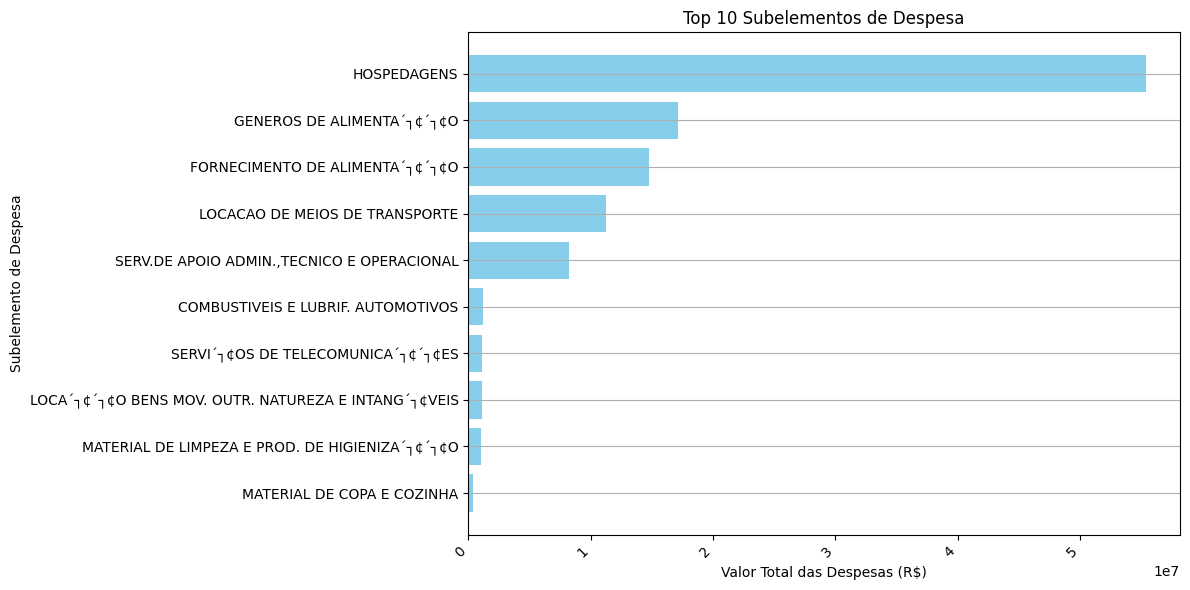

In [23]:
#1 - Total de Despesas
#1.3 - Despesas por subelemento

#TOP 10 Subelementos

# Ordenar por valor total e pegar os top 10 subelementos
top_10_subelementos = despesas_por_subelemento.sort_values(by='VALOR', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
plt.barh(top_10_subelementos['SUBELEMENTO DE DESPESA'][::-1], top_10_subelementos['VALOR'][::-1], color='skyblue')



# Adicionar título e rótulos
plt.title('Top 10 Subelementos de Despesa')
plt.ylabel('Subelemento de Despesa')
plt.xlabel('Valor Total das Despesas (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

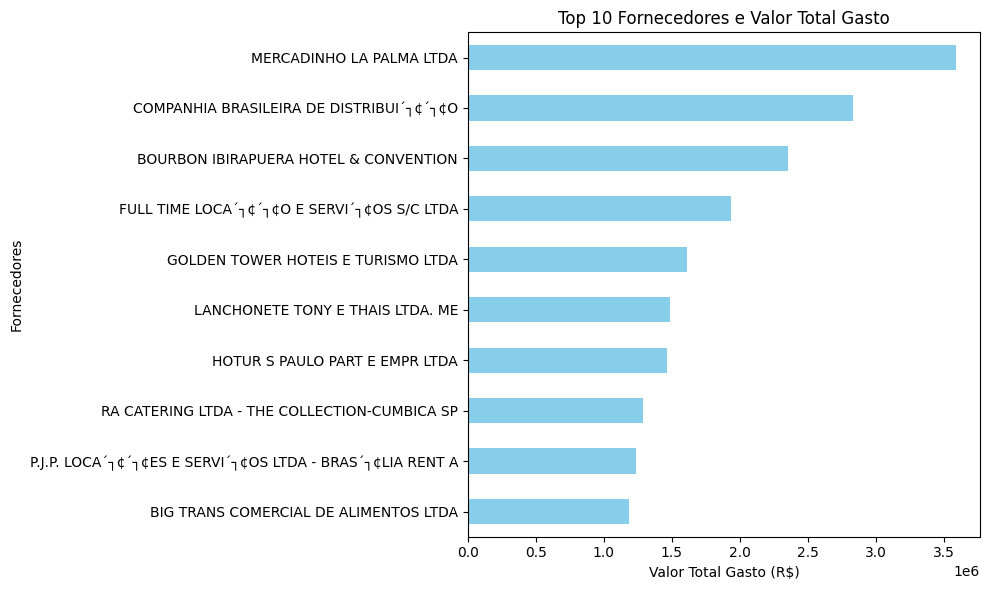

In [24]:
#1 - Total de Despesas
#1.4 - Despesas por fornecedor

# Agrupar os dados pelo nome do fornecedor e somar os valores gastos
gastos_por_fornecedor = df.groupby('NOME FORNECEDOR')['VALOR'].sum().sort_values(ascending=False)

# Selecionar os 10 principais fornecedores
top_10_fornecedores = gastos_por_fornecedor.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_fornecedores.plot(kind='barh', color='skyblue')

# Adicionar título e rótulos
plt.title('Top 10 Fornecedores e Valor Total Gasto')
plt.xlabel('Valor Total Gasto (R$)')
plt.ylabel('Fornecedores')

# Inverter a ordem das barras para ter o maior valor no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

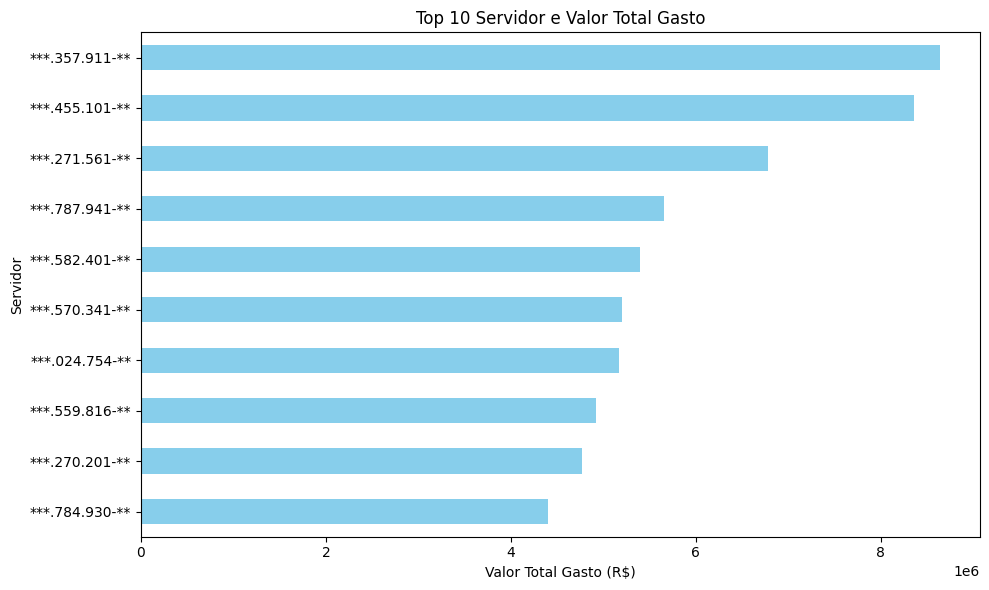

In [25]:
#1 - Total de Despesas
#1.5 - Despesas por servidor

# Agrupar os dados pelo nome do servidor e somar os valores gastos
gastos_por_servidor = df.groupby('CPF SERVIDOR')['VALOR'].sum().sort_values(ascending=False)

# Selecionar os 10 principais servidores
top_10_servidor = gastos_por_servidor.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_servidor.plot(kind='barh', color='skyblue')

# Adicionar título e rótulos
plt.title('Top 10 Servidor e Valor Total Gasto')
plt.xlabel('Valor Total Gasto (R$)')
plt.ylabel('Servidor')

# Inverter a ordem das barras para ter o maior valor no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [26]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?

# Agrupar os dados pelo CPF do servidor e contar o número de transações/gastos
transacoes_por_servidor = df.groupby('CPF SERVIDOR').agg(
    num_transacoes=('VALOR', 'count'),
    valor_total=('VALOR', 'sum')
)

# Encontrar o servidor com o maior número de transações
servidor_mais_transacoes = transacoes_por_servidor.sort_values(by='num_transacoes', ascending=False).head(1)

# Exibir o resultado
print(servidor_mais_transacoes)

                num_transacoes  valor_total
CPF SERVIDOR                               
***.787.941-**            6779   5651306.57


In [27]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
#Quanto ele gastou por ano ?
df[df['CPF SERVIDOR'] == "***.787.941-**"].groupby(["ANO PGTO"])['VALOR'].sum()

ANO PGTO
2003    1072273.81
2004    1301207.84
2005     680218.86
2006     826067.80
2007     545548.65
2008     846522.22
2009     379467.39
Name: VALOR, dtype: float64

In [28]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
#E por fornecedor ?
df[df['CPF SERVIDOR'] == "***.787.941-**"].groupby(["ANO PGTO","NOME FORNECEDOR"])['VALOR'].sum()


ANO PGTO  NOME FORNECEDOR                                   
2003      A.C. PORTELA IMPORTA´┐¢´┐¢O E EXPORTA´┐¢´┐¢O LTDA       266.73
          ALLAN RODRIGUES BENTO - ME                              300.00
          AMAZON CATERING LTDA                                   5920.00
          ANNA RENT A CAR - MAIA LOCADORA DE VE´┐¢CULOS LTDA    48107.73
          ARCOS DOURADOS COM. DE ALIM. LTDA                       364.80
                                                                  ...   
2009      SERVICOM CATERING - REFEI´┐¢´┐¢ES LTDA                  299.65
          TELEMAR NORTE LESTE S/A                                5062.99
          TELEMAR NORTE LESTE SA                                 3050.34
          VALEVERDE TURISMO                                     48073.84
          VILLE ATL´┐¢NTICO HOT´┐¢IS E TURISMO LTDA              6412.00
Name: VALOR, Length: 672, dtype: float64

In [29]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
# 2.1 - Para cada ano, encontrar o servidor com o maior número de transações/gastos

# Agrupar os dados por ano e CPF do servidor, contando as transações e somando os valores
transacoes_por_servidor_ano = df.groupby(['ANO PGTO', 'CPF SERVIDOR']).agg(
    num_transacoes=('VALOR', 'count'),
    valor_total=('VALOR', 'sum')
)

# Para cada ano, encontrar o servidor com o maior número de transações
servidor_mais_transacoes_ano = transacoes_por_servidor_ano.loc[
    transacoes_por_servidor_ano.groupby('ANO PGTO')['num_transacoes'].idxmax()
]

# Exibir o resultado
print(servidor_mais_transacoes_ano)


                         num_transacoes  valor_total
ANO PGTO CPF SERVIDOR                               
2003     ***.787.941-**             820   1072273.81
2004     ***.787.941-**             853   1301207.84
2005     ***.765.178-**             951     68313.13
2006     ***.787.941-**            1645    826067.80
2007     ***.270.201-**            1241    445200.98
2008     ***.787.941-**            1341    846522.22
2009     ***.559.816-**            1214    991374.77
2010     ***.570.341-**            1099    549583.83
2011     ***.559.816-**             910   1087816.80
2012     ***.004.131-**             744    563534.19
2013     ***.004.131-**             904    811986.00
2014     ***.543.801-**            2051    784010.78
2015     ***.543.801-**            1880    778884.04
2016     ***.543.801-**             919    446941.12
2017     ***.118.204-**            1479    616639.29
2018     ***.002.851-**            1293    687536.68
2019     ***.135.521-**            1130    528

In [30]:
#2 - Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?
# 2.1 - Para cada ano, encontrar o servidor com o maior número de transações/gastos

#Em quais anos o CPF ***.787.941-** foi o que mais gastou.
servidor_mais_transacoes_ano.reset_index().where(servidor_mais_transacoes_ano.reset_index()["CPF SERVIDOR"] == "***.787.941-**").dropna()

,ANO PGTO,CPF SERVIDOR,num_transacoes,valor_total
0,2003.0,***.787.941-**,820.0,1072273.81
1,2004.0,***.787.941-**,853.0,1301207.84
3,2006.0,***.787.941-**,1645.0,826067.80
5,2008.0,***.787.941-**,1341.0,846522.22


In [31]:
# Agrupar por fornecedor e mês de pagamento
df['Mes_Ano'] = df['DATA PGTO'].dt.to_period('M')
uso_por_mes_fornecedor = df.groupby(['NOME FORNECEDOR', 'Mes_Ano'])['VALOR'].sum().reset_index()

print(uso_por_mes_fornecedor.sort_values(by='VALOR',
                                         ascending=False).head(20))


                                         NOME FORNECEDOR  Mes_Ano      VALOR
25596                           SAUIPE S.A - SAUIPE PARK  2008-12  588675.55
17293                            LOCALIZA RENT A CAR S/A  2005-12  553027.26
17272                            LOCALIZA CAR RENTAL S/A  2008-12  374081.34
14671                     HOTUR S PAULO PART E EMPR LTDA  2021-01  312903.36
12523        FULL TIME LOCA´┐¢´┐¢O E SERVI´┐¢OS S/C LTDA  2004-01  292232.84
22752                                      PRIVATPORT SA  2018-01  246083.78
14674                     HOTUR S PAULO PART E EMPR LTDA  2022-03  217711.45
14673                     HOTUR S PAULO PART E EMPR LTDA  2021-12  202936.70
12516        FULL TIME LOCA´┐¢´┐¢O E SERVI´┐¢OS S/C LTDA  2003-06  198636.57
14670                     HOTUR S PAULO PART E EMPR LTDA  2020-12  180154.20
23809               RENAISSANCE DO BRASIL HOTELARIA LTDA  2014-10  173516.39
12520        FULL TIME LOCA´┐¢´┐¢O E SERVI´┐¢OS S/C LTDA  2003-10  168645.30

In [32]:
#3 - Analisar a relação entre servidores e fornecedores para identificar padrões de uso ao longo do tempo.

# Agrupar os dados por servidor e fornecedor, somando os valores
despesas_servidores_fornecedores = df.groupby(['ANO PGTO', 'MES PGTO', 'CPF SERVIDOR', 'NOME FORNECEDOR']).agg(
    valor_total=('VALOR', 'sum')
).reset_index()

# Exibir o resultado
display(despesas_servidores_fornecedores.head(30))


,ANO PGTO,MES PGTO,CPF SERVIDOR,NOME FORNECEDOR,valor_total
0,2003,1,***.004.131-**,A FEITICEIRA,64.20
1,2003,1,***.004.131-**,AGC COMERCIO E REPRESENTA´┐¢´┐¢O,20.00
2,2003,1,***.004.131-**,AGROPECU´┐¢RIA MENDES C´┐¢SAR LTDA - AGROMATA,88.00
3,2003,1,***.004.131-**,BIG BOX COMERCIAL S´┐¢O PATRICIO,317.67
4,2003,1,***.004.131-**,CARREFOUR,415.70
5,2003,1,***.004.131-**,CASA DO RIO GRANDE DO SUL,368.00
6,2003,1,***.004.131-**,CASA NEVES ME,158.40
7,2003,1,***.004.131-**,CASAS DA LAVOURA PITTA E SANTOS LTDA,21.70
8,2003,1,***.004.131-**,CIA BRAS. DE DISTRIB.,149.28
9,2003,1,***.004.131-**,COMPANHIA BRASILEIRA DE DISTRIBUI´┐¢´┐¢O,981.38


In [33]:
# Examinar as datas para identificar picos de gastos e entender em quais períodos as despesas foram mais intensas.

import pandas as pd
from IPython.display import display

def formatar_valor(valor):
    """
    Formata um valor numérico em uma string representando o valor em milhares (K) ou milhões (M).
    
    Parâmetros:
    valor (float): O valor a ser formatado.
    
    Retorna:
    str: O valor formatado como string. 
         - Se o valor for igual ou superior a 1.000.000, retorna o valor em milhões (M).
         - Se o valor for igual ou superior a 1.000, retorna o valor em milhares (K).
         - Caso contrário, retorna o valor em sua forma original com duas casas decimais.
    """
    if valor >= 1_000_000:
        return f"{valor / 1_000_000:.2f}M" 
    elif valor >= 1_000:
        return f"{valor / 1_000:.2f}K" 
    else:
        return f"{valor:.2f}"

df.columns = df.columns.str.strip()

df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], errors='coerce') # Converter a coluna 'DATA PGTO' para o tipo datetime

df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce') # Converter a coluna 'VALOR' para tipo numérico

df['AnoMes'] = df['DATA PGTO'].dt.to_period('M') 
despesas_mensais = df.groupby('AnoMes')['VALOR'].sum().reset_index()

top_10_meses = despesas_mensais.sort_values(by='VALOR', ascending=False).head(10) # Ordenar por valor total e pegar os top 10 meses

top_10_meses['Ranking'] = range(1, len(top_10_meses) + 1)

top_10_meses['VALOR'] = top_10_meses['VALOR'].apply(formatar_valor) # Formatar a coluna VALOR

top_10_meses = top_10_meses[['Ranking', 'AnoMes', 'VALOR']] # Reorganizar colunas para exibir o ranking primeiro

display(top_10_meses)


,Ranking,AnoMes,VALOR
71,1,2008-12,1.68M
215,2,2020-12,1.39M
230,3,2022-03,1.34M
227,4,2021-12,1.28M
225,5,2021-10,1.24M
231,6,2022-04,1.21M
141,7,2014-10,1.19M
212,8,2020-09,1.07M
221,9,2021-06,1.07M
138,10,2014-07,1.04M
